### Applied Statistics: Assignment 4_ Natisha Mallick_EC 22373

In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


#### Solution 1

C:\Users\Natisha\anaconda3\lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


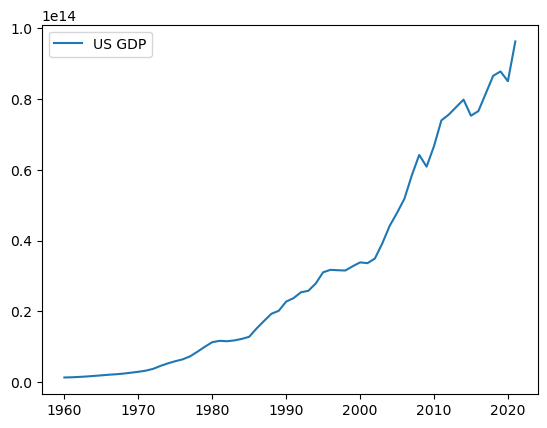

In [2]:
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np

gdp_data = wb.download(indicator='NY.GDP.MKTP.CD' , country='WLD' , start='1960' , end='2021')
# Data is returned in inverse chronological order, so reverse order
time = np.arange(1960,2022)
#plot world gdp against time
gdp = gdp_data.iloc[:,0].astype(float).to_numpy()
gdp = np.flip(gdp)
plt.plot(time,gdp,label='US GDP')
plt.legend()
plt.show()


In [3]:
time

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021])

#### Solution 1.1

##### The transformation we are using is Log Likelihood. 

#### Solution 1.2

In [4]:
gdp_data = gdp_data.reset_index()
gdp_data['year'] = gdp_data['year'].astype(int)
gdp_data['NY.GDP.MKTP.CD'] = gdp_data['NY.GDP.MKTP.CD'].astype(float)

In [5]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt
from numpy import log
from statsmodels.tsa.stattools import adfuller


#### Applying Linear Regression

Linear equation:  y=-111.964156 + 0.071541 * t
The Slope is : 0.07154059169048109
The Intercept is : -111.96415555283387


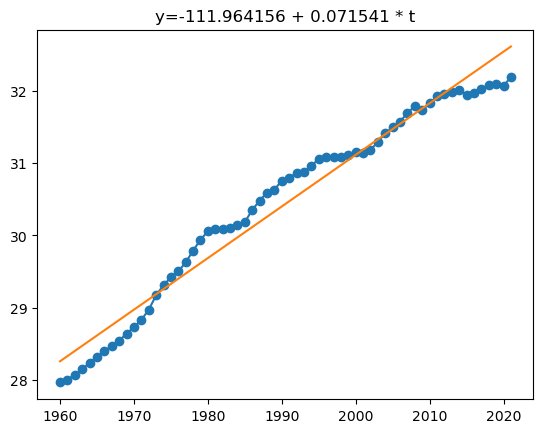

In [6]:
parameter = np.polyfit(time, np.log(gdp),deg=1)
transform = np.polyval(parameter,time)
error = np.sum((transform-np.log(gdp))**2)
plt.scatter(time, np.log(gdp))
plt.plot(time, np.log(gdp))
plt.plot(time,transform)
str = 'y=%f + %f * t'%(parameter[1], parameter[0])
print("Linear equation: ", str)
plt.title(str)

print("The Slope is :", parameter[0])
print("The Intercept is :", parameter[1])

In [7]:
correlation = np.corrcoef(time, np.log(gdp))[0,1]
print("Correlation is :", correlation)
print("R2 square: ",correlation**2)

Correlation is : 0.9827296778828633
R2 square:  0.9657576197917561


#### Solution 1.3

In [8]:
linear_equation = [parameter[0] * i + parameter[1] for i in time]
residuals = np.log(gdp) - linear_equation
residual_mean = np.mean(residuals)
residual_standard_dev = np.std(residuals)

print('Residual mean:  ', residual_mean)
print('Residual standard deviation -> ', residual_standard_dev)
normal_distribution = np.random.normal(loc = 0, scale = residual_standard_dev, size = len(residuals))

Residual mean:   -1.2371465858919808e-13
Residual standard deviation ->  0.24107101576840748


In [9]:
from scipy.stats import ks_2samp
ks_stats, ks_p = ks_2samp(normal_distribution , residuals)
print('KS statistic value:  ', ks_stats)
print('KS p value: ', ks_p)

KS statistic value:   0.12903225806451613
KS p value:  0.6846775783501532


##### As the p value is 0.828 which is great than 0.01 (as specified) we cannot reject the null hypothesis.

#### Solution 1.4

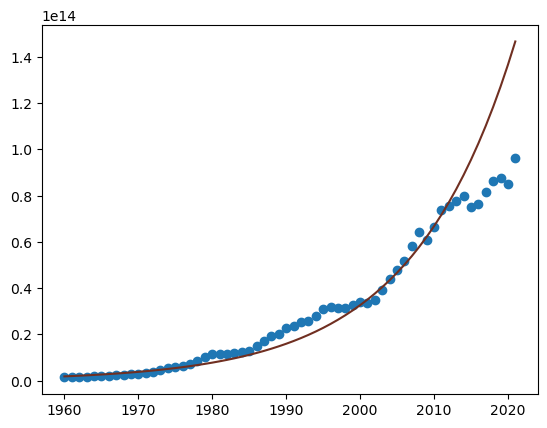

In [10]:
non_linear = np.exp(linear_equation)
plt.figure()
plt.scatter(time, gdp)
plt.plot(time, non_linear, '#702f21')
plt.show()

#### Solution 1.5

In [11]:
print("The Slope is :", parameter[0])

The Slope is : 0.07154059169048109


In [12]:
import math
growth_rate = math.exp(parameter[0])-1
print('Long Term Growth Rate rounded to 2 decimal places: ',round(growth_rate,2))

Long Term Growth Rate rounded to 2 decimal places:  0.07


##### The economy will grow by 7% if there is an yearly growth of 7% on average.

In [13]:
if round(growth_rate,2) == round(parameter[0],2):
    print("The slope and long term growth rate are same")
else:
    print("The slope and long term growth rate are NOT same")

The slope and long term growth rate are same


#### Solution 1.6

In [14]:
gdp_dataQ6 = gdp_data[gdp_data['year']>=2015]
gdp_dataQ6.head(10)

,country,year,NY.GDP.MKTP.CD
0,World,2021,9.610009e+13
1,World,2020,8.490681e+13
2,World,2019,8.765286e+13
3,World,2018,8.641303e+13
4,World,2017,8.140398e+13
5,World,2016,7.646559e+13
6,World,2015,7.517927e+13


Linear equation:  y=-41.448957 + 0.036426 t
The Slope is : 0.03642612598472702
The Intercept is : -41.448957143065535


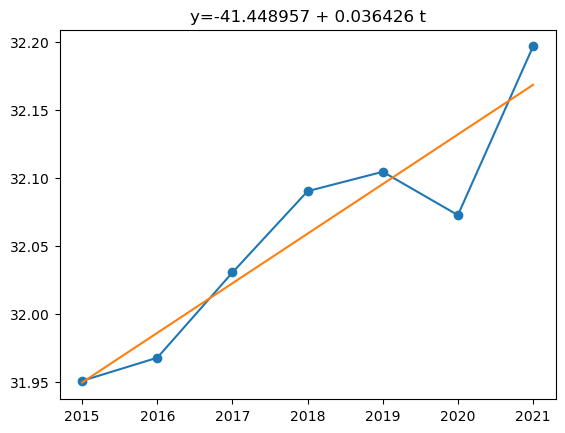

In [15]:
time = gdp_dataQ6['year'].to_numpy()
gdp = np.log(gdp_dataQ6['NY.GDP.MKTP.CD'].to_numpy())
parameter = np.polyfit(time, gdp,deg=1)
transform = np.polyval(parameter,time)
error = np.sum((transform-gdp)**2)
plt.scatter(time, gdp)
plt.plot(time, gdp)
plt.plot(time,transform)
str = 'y=%f + %f t'%(parameter[1], parameter[0])
print("Linear equation: ", str)
plt.title(str)

print("The Slope is :", parameter[0])
print("The Intercept is :", parameter[1])

In [23]:
growth_rate =  math.exp(parameter[0])-1
print('Long Term Growth Rate: ',round(growth_rate,2)*100,"%")

Long Term Growth Rate:  4.0 %


##### The slope is decreasing from 7% to 4% . 

#### Solution 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


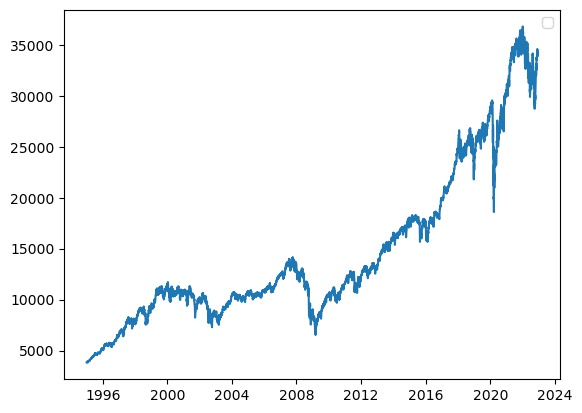

In [17]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np

data = web.DataReader('^DJI','yahoo',start='1995-01-01',end='2022-12-05')
data = data.reset_index()
dates = data['Date']
dow = data['Close'].to_numpy()
plt.plot(dates,dow)
plt.legend()
plt.show()


In [18]:
lags_60=np.array([1,2,3,5,10,15,20,30])

In [19]:
data.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
7022,2022-11-21,33864.589844,33559.179688,33760.300781,33700.281250,352960000,33700.281250
7023,2022-11-22,34115.699219,33810.050781,33810.050781,34098.101562,277070000,34098.101562
7024,2022-11-23,34262.070312,34004.640625,34091.570312,34194.058594,236820000,34194.058594
7025,2022-11-25,34386.511719,34199.570312,34213.039062,34347.031250,131660000,34347.031250
7026,2022-11-28,34303.878906,33799.351562,34275.910156,33849.460938,300330000,33849.460938
7027,2022-11-29,33933.910156,33662.449219,33847.800781,33852.531250,279750000,33852.531250
7028,2022-11-30,34589.769531,33583.769531,33795.429688,34589.769531,524440000,34589.769531
7029,2022-12-01,34595.511719,34129.351562,34533.589844,34395.011719,348720000,34395.011719
7030,2022-12-02,34483.210938,34039.730469,34265.449219,34429.878906,290580000,34429.878906
7031,2022-12-05,34335.730469,33846.808594,34335.730469,33947.101562,312960000,33947.101562


C:\Users\Natisha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0, 0.5, 'PACF')

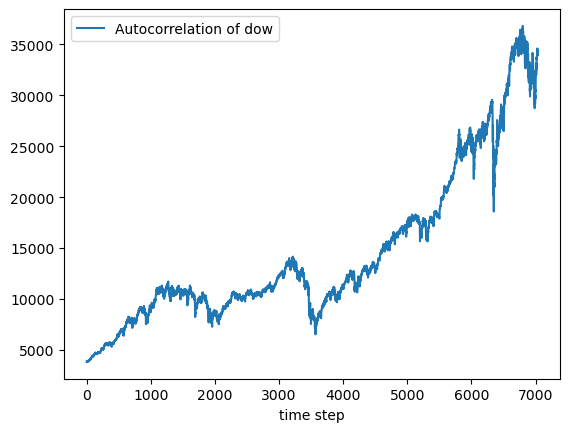

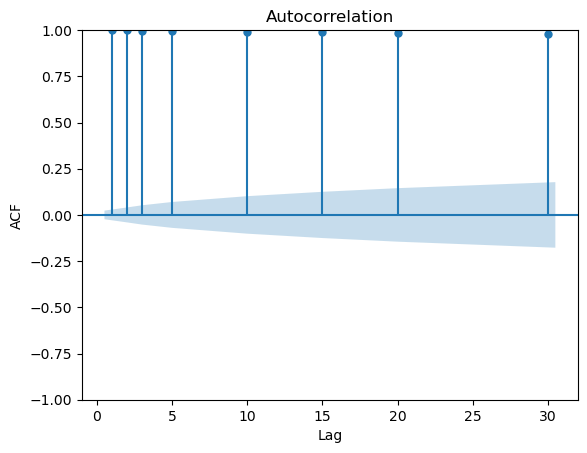

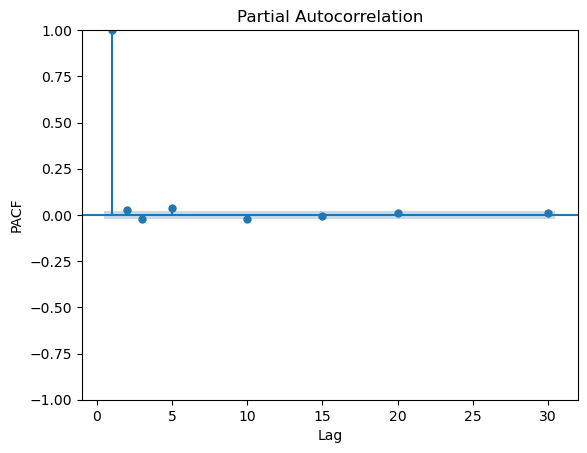

In [20]:
dow = data['Close'].to_numpy()
dow_ = dow
plt.figure()
plt.plot(dow_,label='Autocorrelation of dow')
plt.xlabel('time step')
plt.legend()
plot_acf(dow_, lags = lags_60)
plt.xlabel('Lag')
plt.ylabel('ACF')
plot_pacf(dow_, lags = lags_60)
plt.xlabel('Lag')
plt.ylabel('PACF')

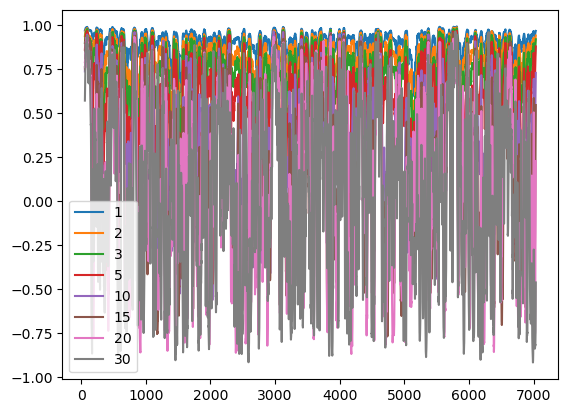

In [21]:
auto_correlation = []
for lag in lags_60:
    auto_correlation = data['Close'].rolling(60).apply(lambda x: pd.Series(x).autocorr(lag = lag))
    auto_correlation.plot()
plt.legend(lags_60)
plt.show()


##### Solution 2.2

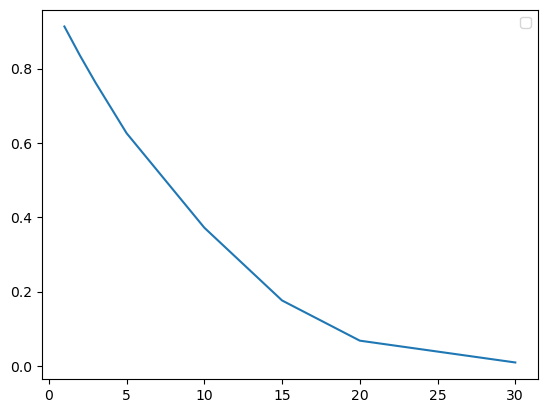

In [24]:
auto_correlation1 = []
for lag in lags_60:
    auto_correlation =np.mean(data['Close'].rolling(60).apply(lambda x: pd.Series(x).autocorr(lag = lag)))
    auto_correlation1.append(auto_correlation)
plt.legend(lags_60)
plt.plot(lags_60,auto_correlation1)
plt.show()

In [25]:
data1 = data
data1 = data1.set_index('Date')
data1.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,3845.199951,3827.709961,3834.399902,3838.479980,24440000,3838.479980
1995-01-04,3857.989990,3831.070068,3838.500000,3857.649902,27220000,3857.649902
1995-01-05,3860.679932,3843.189941,3857.600098,3850.919922,25810000,3850.919922
1995-01-06,3887.260010,3841.840088,3850.899902,3867.409912,30240000,3867.409912
1995-01-09,3874.479980,3853.280029,3867.399902,3861.350098,20820000,3861.350098


##### This shows that Dow Jones does not have white noise process as the samples donot have equal intensities at every frequency. 

#### Solution 2.3

In [26]:
data['daily_return'] = data['Close'].pct_change()

#Drop all Not a number values using drop method.
data['daily_return'].dropna(inplace = True)

data

,Date,High,Low,Open,Close,Volume,Adj Close,daily_return
0,1995-01-03,3845.199951,3827.709961,3834.399902,3838.479980,24440000,3838.479980,NaN
1,1995-01-04,3857.989990,3831.070068,3838.500000,3857.649902,27220000,3857.649902,0.004994
2,1995-01-05,3860.679932,3843.189941,3857.600098,3850.919922,25810000,3850.919922,-0.001745
3,1995-01-06,3887.260010,3841.840088,3850.899902,3867.409912,30240000,3867.409912,0.004282
4,1995-01-09,3874.479980,3853.280029,3867.399902,3861.350098,20820000,3861.350098,-0.001567
...,...,...,...,...,...,...,...,...
7027,2022-11-29,33933.910156,33662.449219,33847.800781,33852.531250,279750000,33852.531250,0.000091
7028,2022-11-30,34589.769531,33583.769531,33795.429688,34589.769531,524440000,34589.769531,0.021778
7029,2022-12-01,34595.511719,34129.351562,34533.589844,34395.011719,348720000,34395.011719,-0.005631
7030,2022-12-02,34483.210938,34039.730469,34265.449219,34429.878906,290580000,34429.878906,0.001014


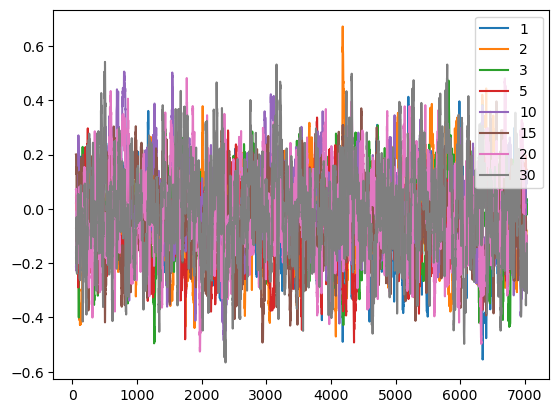

In [27]:
auto_correlation = []
for lag in lags_60:
    auto_correlation = data['daily_return'].rolling(60).apply(lambda x: pd.Series(x).autocorr(lag = lag))
    auto_correlation.plot()
plt.legend(lags_60)
plt.show()

C:\Users\Natisha\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\Natisha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0, 0.5, 'PACF')

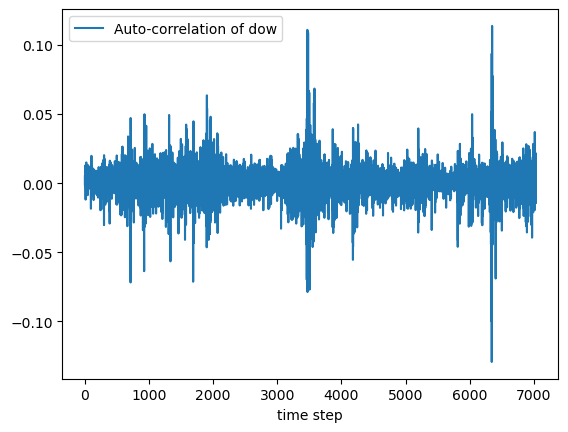

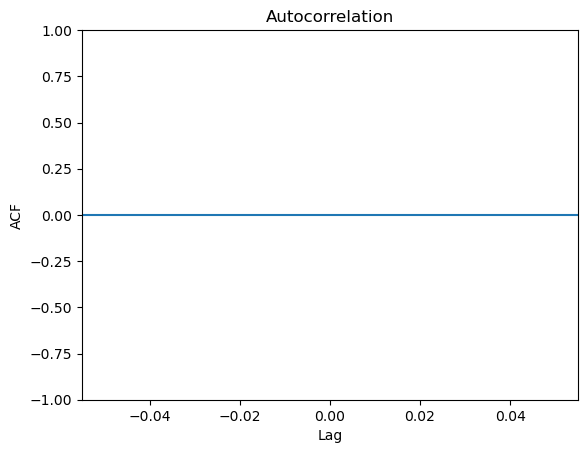

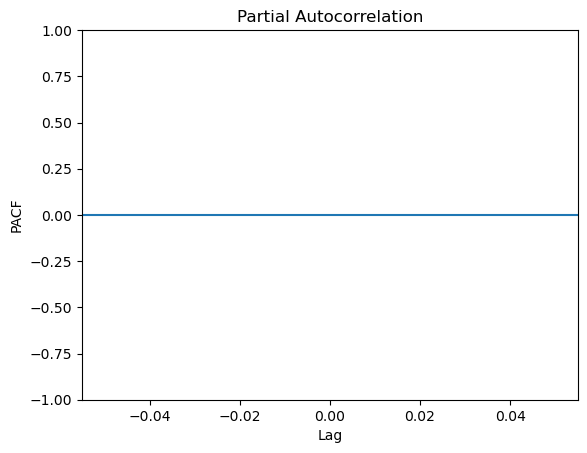

In [28]:
dow = data['daily_return'].to_numpy()
plt.figure()
plt.plot(dow,label='Auto-correlation of dow')
plt.xlabel('time step')
plt.legend()
plot_acf(dow, lags = lags_60)
plt.xlabel('Lag')
plt.ylabel('ACF')
plot_pacf(dow, lags = lags_60)
plt.xlabel('Lag')
plt.ylabel('PACF')

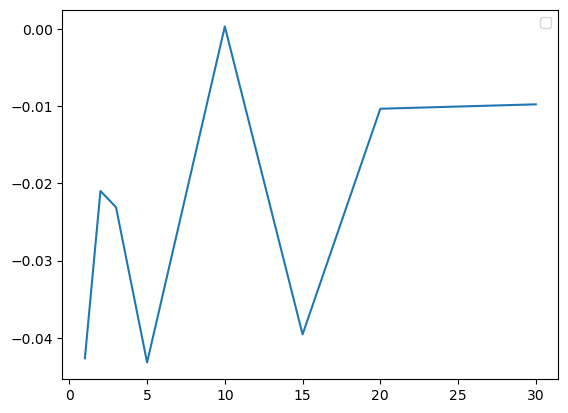

In [29]:
auto_correlation1 = []
for lag in lags_60:
    auto_correlation =np.mean(data['daily_return'].rolling(60).apply(lambda x: pd.Series(x).autocorr(lag = lag)))
    auto_correlation1.append(auto_correlation)
plt.legend(lags_60)
plt.plot(lags_60,auto_correlation1)
plt.show()

##### It is a white noise process as the samples have equal intensities at at every frequency. 